## Chapter 4
# Whistler Data

In [1]:
import sys
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))

from sample import Sample
from dataset import Dataset
from database import Database
from sample_detector import SampleDetector

dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
site = 'marion'
my_dataset = Dataset(dataset_loc, site)
my_database = Database(dataset_loc, database_loc, site)
file = np.random.choice(my_database.get_train(),1)[0]

Using TensorFlow backend.


## 4.1 Data
2196 files from Marion and 375 files from Sanae

100%|██████████| 2196/2196 [02:05<00:00, 16.69it/s]


(array([  10, 1671,  126,  113,  131,   58,   31,   24,   12,    9,   11]), array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]))


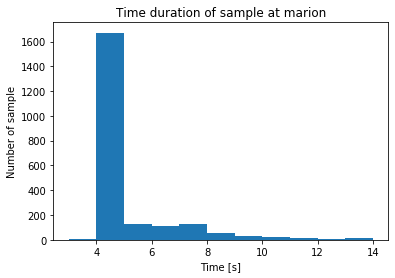

100%|██████████| 374/374 [00:14<00:00, 26.17it/s]


(array([  0, 239,  41,  33,  27,   9,  11,   3,   5,   4,   2]), array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]))


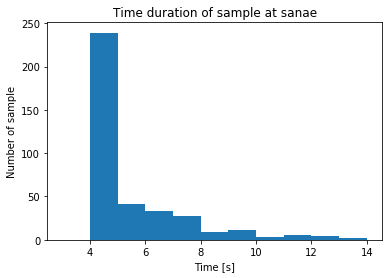

In [3]:
sites = ['marion', 'sanae']
for site in sites:
    my_dataset = Dataset(dataset_loc, site)
    files = my_dataset.get_samples()
    time = []
    bins = np.linspace(3,14,12)
    for file in tqdm(files):
        sample = Sample(dataset_loc, site, file)
        time.append(sample.get_time().max())
    print(np.histogram(time, bins=bins))
    plt.figure()
    plt.hist(time, bins=bins)
    plt.xlabel('Time [s]')
    plt.ylabel('Number of sample')
    plt.title('Time duration of sample at '+site)
    plt.show()

### 4.1.2 Data Representation
#### Time Representation
figure: *ch4_time_rep_sig* 

Train: 2013-06-25UT16:51:13.10691922.marion.vr2


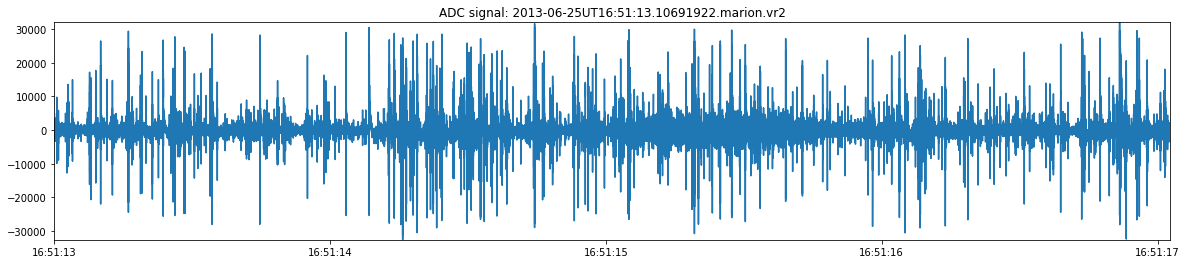

[1.] [[-15.88440714]] [[[6529866.74047137]]]


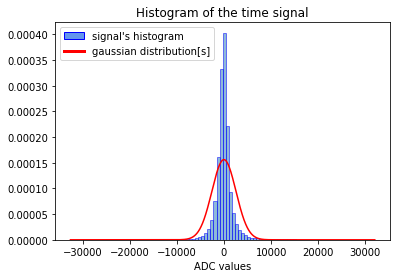

In [2]:
site = 'marion'
file = '2013-06-25UT16:51:13.10691922.marion.vr2'
print('Train:' if file in my_database.get_train() else 'Test:', file)
my_sample = SampleDetector(dataset_loc, site,file)

freq_size = 4
my_sample.spectrogram_with_axis(log10=True)
size = (freq_size*my_sample.get_time_freq_ratio(dec=0), freq_size)
my_sample.signal_plot(sig=None, EW=True, figsize=size, title="ADC signal: "+my_sample.get_file())
my_sample.signal_hist(EW=True, figsize=None, xlabel='ADC values', title='Histogram of the time signal')

#### Time-Frequency Representation

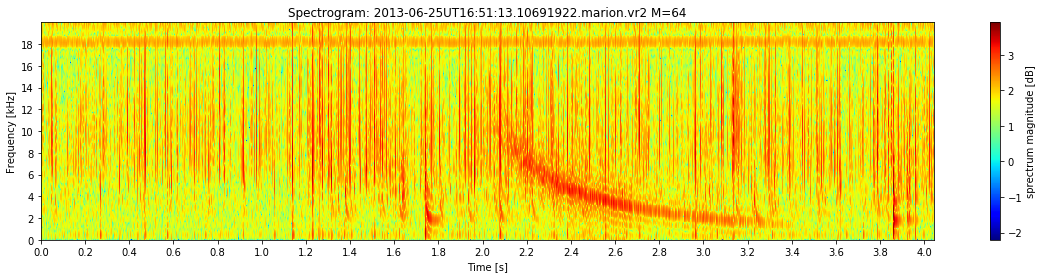

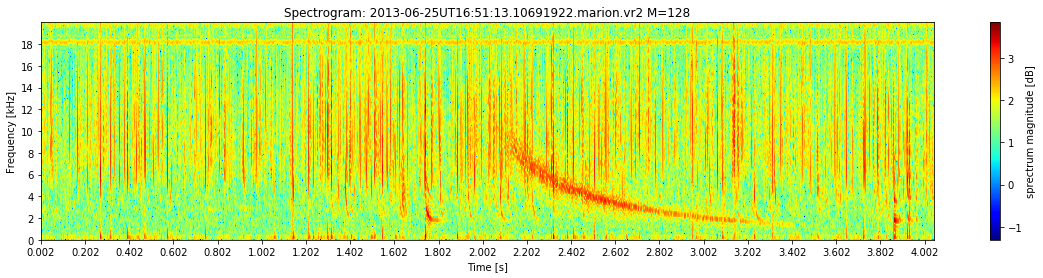

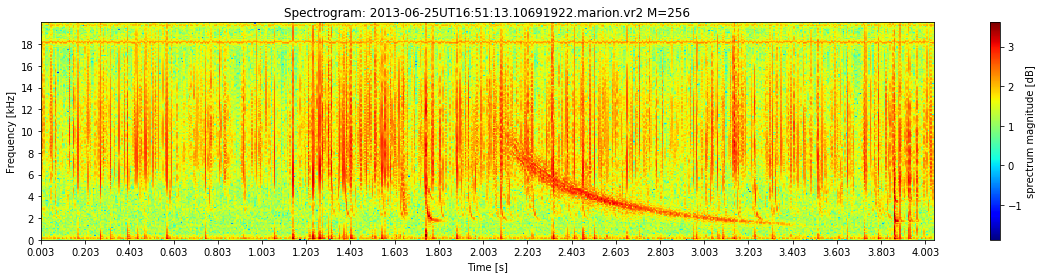

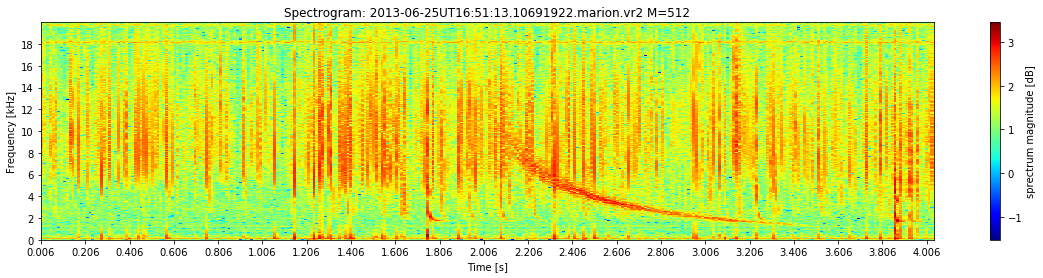

In [7]:
for M in [2**6,2**7,2**8,2**9]:
    my_sample.spectrogram_with_axis(nperseg = M,nfft=512)
    my_sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+my_sample.get_file()+' M='+str(M), cmap='jet', cmap_show=True)
#     print(my_sample.get_spectrogram().shape)

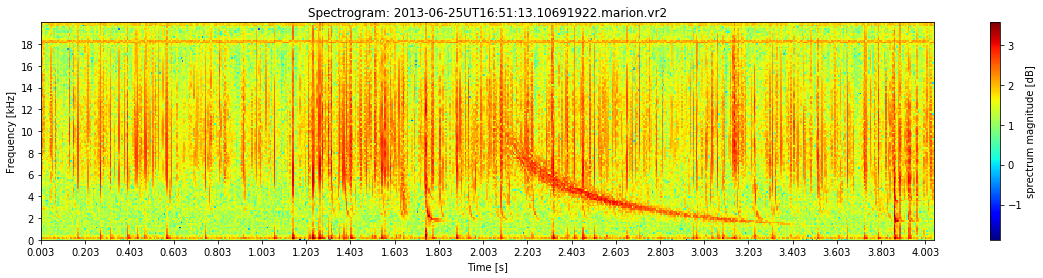

In [8]:
my_sample.spectrogram_with_axis(nperseg = 256, nfft=256)
my_sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+my_sample.get_file(), cmap='jet', cmap_show=True)

### 4.1.3 Data Partitioning

Train: 2013-05-20UT17:35:25.37022156.marion.vr2


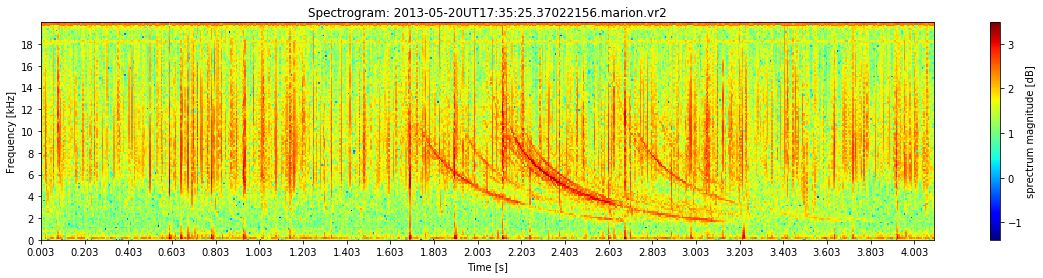

(129, 640)
2012-05-07UT18:35:59.71878125.sanae.vr2


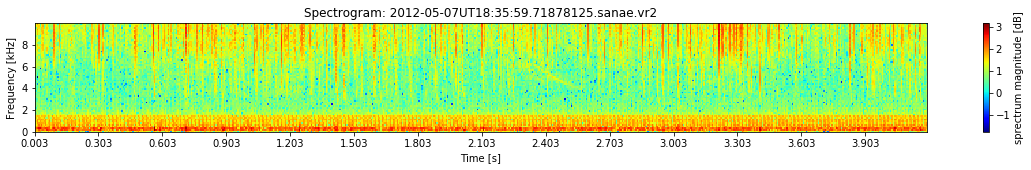

(65, 656)


In [6]:
site = 'marion'
file = np.random.choice(my_database.get_train(),1)[0]
file = '2013-06-25UT16:51:13.10691922.marion.vr2'
file = '2013-05-20UT17:35:25.37022156.marion.vr2'
print('Train:' if file in my_database.get_train() else 'Test:', file)
my_sample = SampleDetector(dataset_loc, site,file)
size = (freq_size*my_sample.get_time_freq_ratio(dec=0), 4)
my_sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+my_sample.get_file(), cmap='jet', cmap_show=True)
print(my_sample.get_spectrogram().shape)
site = 'sanae'
my_dataset = Dataset(dataset_loc, site)
files = my_dataset.get_samples() 
file = files[np.random.randint(len(files))]
# file = '2012-08-02UT05:31:37.62438117.sanae.vr2'
# file = '2012-09-29UT05:31:41.31078125.sanae.vr2'
file = '2012-05-07UT18:35:59.71878125.sanae.vr2'
print(file)
my_sample = SampleDetector(dataset_loc, site,file)

my_sample.spectrogram_with_axis(nperseg = 128, nfft=128)
# size = (4*my_sample.get_time_freq_ratio(dec=0), 4)
my_sample.spectrogram_plot(figsize=(size[0],2), xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.3,2],
                           title="Spectrogram: "+my_sample.get_file(), cmap='jet', cmap_show=True)
print(my_sample.get_spectrogram().shape)

### 4.1.4 Statistical Analysis of the Spectrogram
Data histogram and gaussian distributions

SANAE IV: 
* (0.266654 1.4454327 0.16857324)
* (0.733346 0.49774508 0.14257247)

Marion:
* (1 1.44791029 0.26758419)

100%|██████████| 374/374 [00:08<00:00, 45.19it/s]


sanae 1 [1.] [[0.75044977]] [[[0.32513113]]]


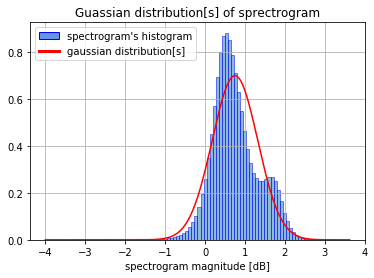

sanae 2 [0.266654 0.733346] [[1.4454327 ]
 [0.49774508]] [[[0.16857324]]

 [[0.14257247]]]


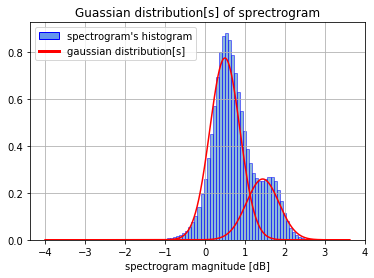

100%|██████████| 2196/2196 [06:51<00:00,  3.16it/s]


marion 1 [1.] [[1.44791029]] [[[0.26758419]]]


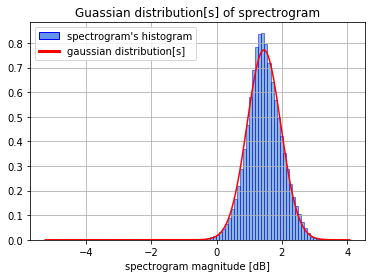

marion 2 [0.55959624 0.44040376] [[1.19717066]
 [1.766511  ]] [[[0.18686963]]

 [[0.18875138]]]


In [ ]:
import multiprocessing as mp
from sklearn import mixture
import scipy.stats as stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sites = ['sanae', 'marion']
nbr_components = [2,1]
for i in range(2):
    site = sites[i]
    components = nbr_components[i]
    my_dataset = Dataset(dataset_loc, site)
    def get_spec(file):
        return Sample(dataset_loc, site, file).get_spectrogram().flatten()
    files = my_dataset.get_samples()   
    specs = []
    pool = mp.Pool(mp.cpu_count())
    # generate 1D array of all spectrogram data
    for spec in tqdm(pool.imap_unordered(get_spec, files), total=len(files)):
        specs = np.concatenate((specs,spec))
    pool.close()
    pool.join()
    specs = specs.reshape(-1,1)
    # create Gaussian mixture of the data
    g = mixture.GaussianMixture(n_components=components,covariance_type='full')
    g.fit(specs)
    weights, means, covars = g.weights_, g.means_, g.covariances_
    print(site, components, weights, means, covars)
    plt.figure()
    legend = [Patch(facecolor='cornflowerblue', edgecolor='b',label='spectrogram\'s histogram'),
                  Line2D([0], [0], color='red', lw=3, label='gaussian distribution[s]')]
    plt.hist(specs, bins=100, histtype='bar', density=True, ec='blue', alpha=0.5)
    f_axis = specs.copy().ravel()
    f_axis.sort()
    for i in range(components):
        plt.plot(f_axis,weights[i]*stats.norm.pdf(f_axis,means[i],np.sqrt(covars[i])).ravel(), c='red')
    plt.xlabel('spectrogram magnitude [dB]')
    plt.legend(handles=legend, loc='upper left')
    plt.title('Guassian distribution[s] of sprectrogram')
    plt.show()

### 4.1.5 AWD Output

2013-07-07UT07:06:12.94691922.marion.vr2
{'2013-07-07UT07:06:18.355': '63', '2013-07-07UT07:06:18.386': '68', '2013-07-07UT07:06:18.411': '1', '2013-07-07UT07:06:15.658': '65', '2013-07-07UT07:06:15.343': '27'}
5
[[2.39608, 27], [2.71108, 65], [5.40808, 63], [5.43908, 68], [5.46408, 1]]


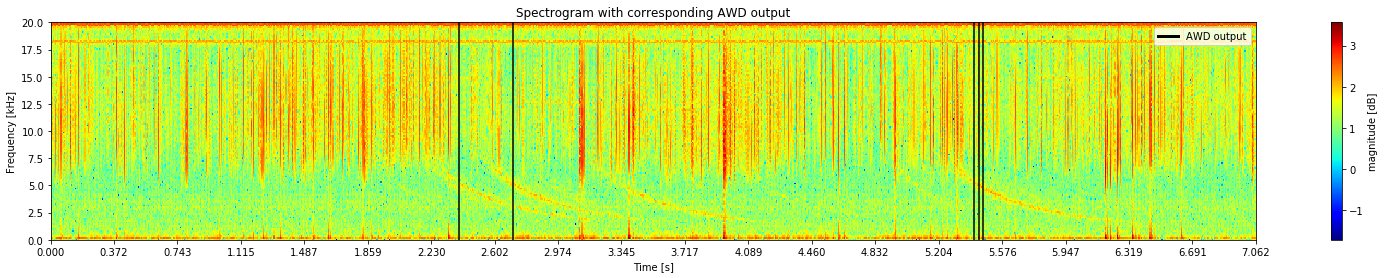

In [70]:
import os, sys
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
from sample import Sample
from dataset import Dataset
from database import Database
from sample_detector import SampleDetector

# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))
dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
site = 'marion'
dataset = Dataset(dataset_loc, site)
database = Database(dataset_loc, database_loc, site)
file = np.random.choice(database.get_train(),1)[0]
# file = '2013-05-20UT17:35:25.37022156.marion.vr2'
# file = '2013-07-03UT15:27:12.00611922.marion.vr2'
file = '2013-07-07UT07:06:12.94691922.marion.vr2'
sample = SampleDetector(dataset_loc, site,file)
sample.spectrogram_with_axis()
size = (3*sample.get_time_freq_ratio(dec=0), 4)

# print(sample.output())
_, awd_output, output = sample.output()
print(file)
print(awd_output)
print(len(awd_output))
output = [[eval(o[0]), eval(o[1])] for o in output ]
print(output)
fig = plt.figure(figsize=size)
img = plt.pcolormesh(sample.get_time(), sample.get_freq(), sample.get_spectrogram(), cmap='jet')
fig.colorbar(mappable=img, label='magnitude [dB]')
for o in output: plt.axvline(o[0], color='black');
plt.xticks(np.linspace(0, sample.get_time()[-1], 20))
plt.xlabel('Time [s]')
plt.ylabel('Frequency [kHz]')
plt.title('Spectrogram with corresponding AWD output')
legend = [Line2D([0], [0], color='black', lw=3, label='AWD output')]
plt.legend(handles=legend, loc='upper right')
plt.show()